In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
migration_df = pd.read_csv("migration-crude-rate.csv")
migration_df.head()

,country_name,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,13.2,7.5,5.1,4.0,4.6,4.4,5.8,15.1,7.2,:
1,Belgium,5.5,2.4,3.2,4.3,5.0,3.9,4.9,10.9,7.6,:
2,Bulgaria,-6.7,-6.8,-6.8,-7.0,-7.3,4.3,6.3,4.2,6.4,:
3,Croatia,-8.0,-9.3,-11.7,-7.5,-4.9,-4.9,-1.2,3.0,7.8,:
4,Cyprus,-2.4,2.9,7.2,9.3,10.0,5.0,6.2,14.3,9.9,:


In [9]:
votes_df = pd.read_csv("party-vote-shares.csv")
votes_df.head()


,country_name,party_name,prev_year,prev_vote,last_year,last_vote
0,Austria,FP�,2019,16.2,2024,28.8
1,Belgium,VB,2019,12.0,2024,14.4
2,Bulgaria,REVIVAL,2023,14.1,2024,13.7
3,Croatia,LAJ c.,2020,9.5,2024,9.5
4,Cyprus,ELAM,2016,3.7,2021,6.8


### Descriptive Statistics

In [11]:
votes_df[['prev_vote', 'last_vote']].describe()

,prev_vote,last_vote
count,27.000000,27.000000
mean,15.548148,18.455556
std,11.642276,11.079341
min,3.200000,1.500000
25%,8.350000,9.400000
50%,11.100000,18.100000
75%,18.250000,24.750000
max,43.700000,41.700000


# Explotarory Data Analysis

### Creating Histograms of Immıgration Rates and Vote Shares
To see how data is distributed

In [18]:
# Transform migration data to long format
migration_long = migration_df.melt(id_vars='country_name', var_name='year', value_name='immigration_rate')
migration_long['year'] = pd.to_numeric(migration_long['year'], errors='coerce')
migration_long['immigration_rate'] = pd.to_numeric(migration_long['immigration_rate'], errors='coerce')


In [19]:
# Ensure numeric format
votes_df['prev_vote'] = pd.to_numeric(votes_df['prev_vote'], errors='coerce')
votes_df['last_vote'] = pd.to_numeric(votes_df['last_vote'], errors='coerce')

# Calculate vote change
votes_df['vote_change'] = votes_df['last_vote'] - votes_df['prev_vote']


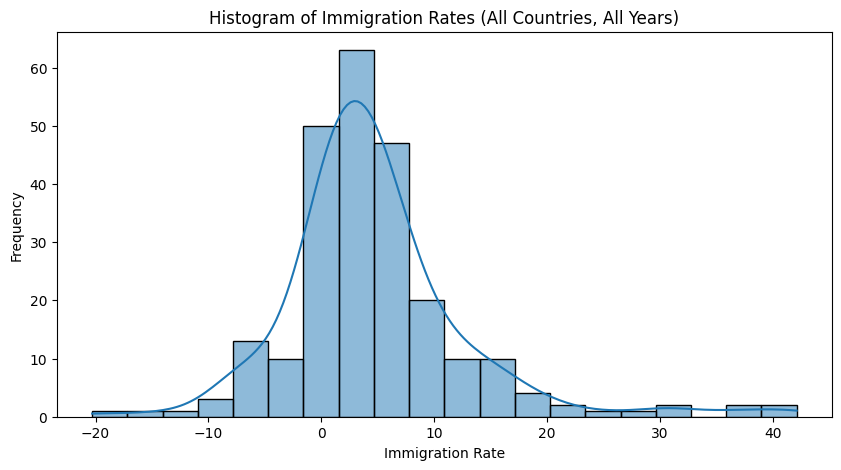

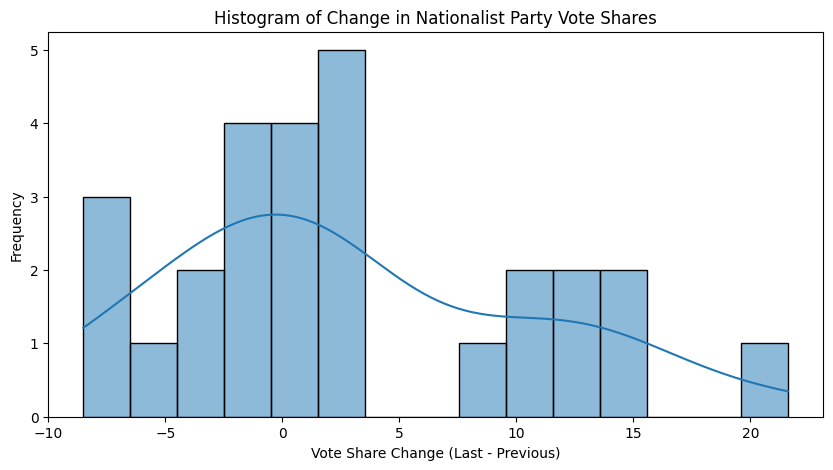

In [20]:
# Histogram for immigration rate
plt.figure(figsize=(10, 5))
sns.histplot(migration_long['immigration_rate'].dropna(), bins=20, kde=True)
plt.title('Histogram of Immigration Rates (All Countries, All Years)')
plt.xlabel('Immigration Rate')
plt.ylabel('Frequency')
plt.show()

# Histogram for vote share change
plt.figure(figsize=(10, 5))
sns.histplot(votes_df['vote_change'].dropna(), bins=15, kde=True)
plt.title('Histogram of Change in Nationalist Party Vote Shares')
plt.xlabel('Vote Share Change (Last - Previous)')
plt.ylabel('Frequency')
plt.show()


### Creating Time Series of Immıgration Rates and Vote Shares
To visually show trends over time

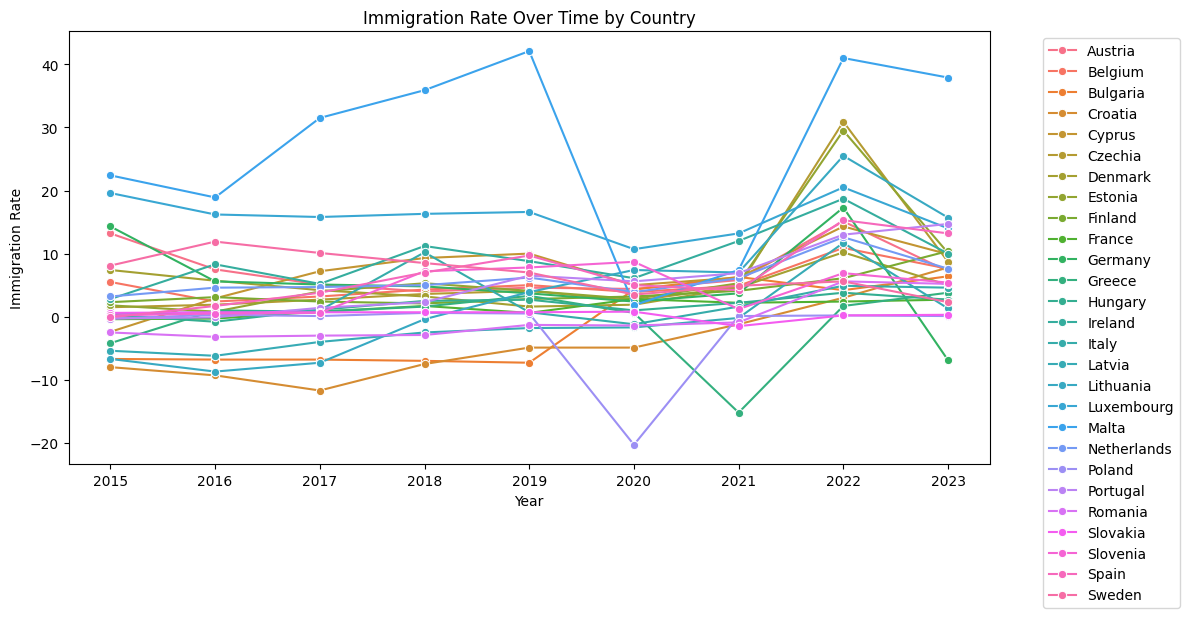

In [21]:
# Line plot: Immigration rate over years by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=migration_long, x='year', y='immigration_rate', hue='country_name', marker='o')
plt.title('Immigration Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Immigration Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [22]:
# Reshape votes_df for time series
votes_prev = votes_df[['country_name', 'prev_year', 'prev_vote']].rename(columns={'prev_year': 'year', 'prev_vote': 'vote_share'})
votes_last = votes_df[['country_name', 'last_year', 'last_vote']].rename(columns={'last_year': 'year', 'last_vote': 'vote_share'})

votes_long = pd.concat([votes_prev, votes_last])
votes_long['year'] = pd.to_numeric(votes_long['year'], errors='coerce')
votes_long['vote_share'] = pd.to_numeric(votes_long['vote_share'], errors='coerce')


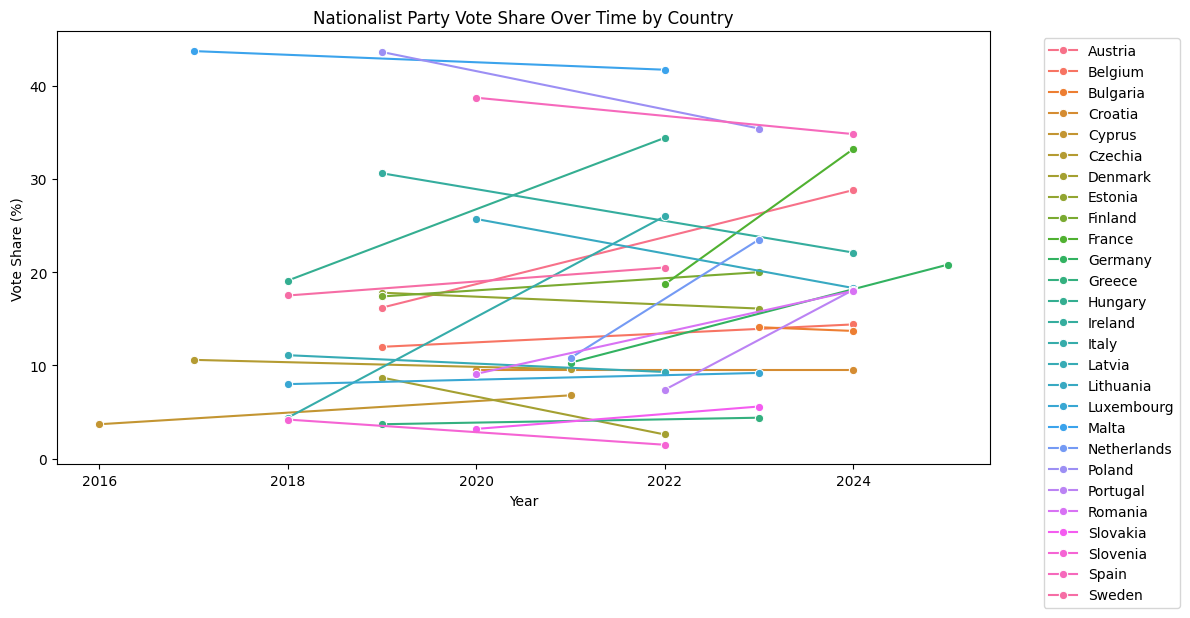

In [23]:
# Line plot: Nationalist vote share over time by country
plt.figure(figsize=(12, 6))
sns.lineplot(data=votes_long, x='year', y='vote_share', hue='country_name', marker='o')
plt.title('Nationalist Party Vote Share Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Creating a Scatterplot where each point represents a country
Looking up for relationships between variables

X-axis: Trend in immigration (average change per year)

Y-axis: Change in nationalist party vote share between elections

In [26]:
# Group migration data by country and calculate trend (yearly change)
immigration_trends = (
    migration_long.sort_values(['country_name', 'year'])
    .groupby('country_name')['immigration_rate']
    .apply(lambda x: x.diff().mean())  # avg yearly change
    .reset_index()
    .rename(columns={'immigration_rate': 'immigration_trend'})
)


In [27]:
# Already available from earlier steps
votes_df['vote_change'] = votes_df['last_vote'] - votes_df['prev_vote']
vote_change = votes_df[['country_name', 'vote_change']]


In [28]:
# Merge immigration trends and vote changes
trend_df = pd.merge(immigration_trends, vote_change, on='country_name')


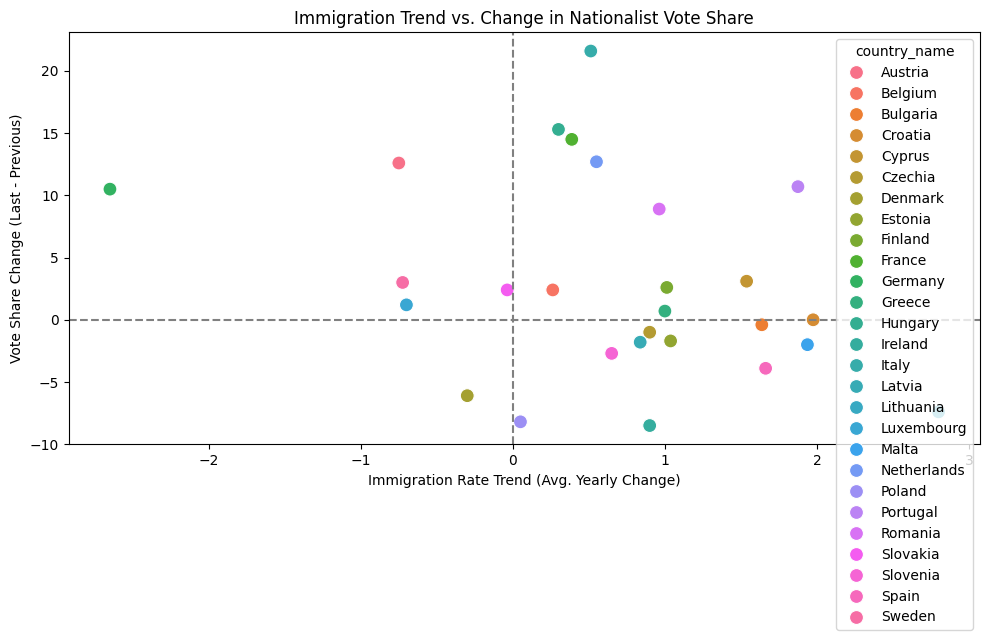

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=trend_df,
    x='immigration_trend',
    y='vote_change',
    hue='country_name',
    s=100
)
plt.title('Immigration Trend vs. Change in Nationalist Vote Share')
plt.xlabel('Immigration Rate Trend (Avg. Yearly Change)')
plt.ylabel('Vote Share Change (Last - Previous)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


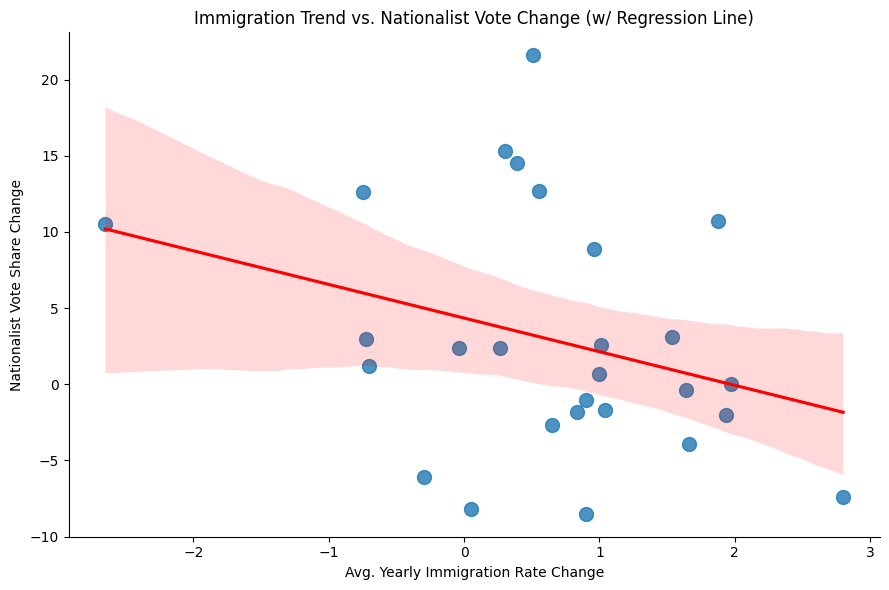

In [30]:
sns.lmplot(
    data=trend_df,
    x='immigration_trend',
    y='vote_change',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 100},
    line_kws={'color': 'red'}
)
plt.title('Immigration Trend vs. Nationalist Vote Change (w/ Regression Line)')
plt.xlabel('Avg. Yearly Immigration Rate Change')
plt.ylabel('Nationalist Vote Share Change')
plt.tight_layout()
plt.show()


# Hypothesis Testing 

### Pearson Correlation Test

In [33]:
from scipy.stats import pearsonr

# Extract variables
x = trend_df['immigration_trend']
y = trend_df['vote_change']

# Perform the test
correlation, p_value = pearsonr(x, y)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation: -0.310
P-value: 0.1162


In [37]:
import statsmodels.api as sm

# Add constant for intercept
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            vote_change   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.649
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.116
Time:                        02:05:04   Log-Likelihood:                -92.148
No. Observations:                  27   AIC:                             188.3
Df Residuals:                      25   BIC:                             190.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3487      1.71